In [ ]:
#Menambahkan library
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

from skimage.color import rgb2gray
from skimage.feature import local_binary_pattern

In [ ]:
#Menambahkan directory file gambar
def load_image(arr):
    strr = "/content/visi komputer/Datasets/*.jpeg"
    for file in glob.glob(strr):
        img=np.asarray(plt.imread(file))
        arr.append(img)
    return arr

In [ ]:
#Membuat fungsi preprocessing
def preprocessing(arr):
    arr_prep=[]
    for i in range(np.shape(arr)[0]):
        img=cv2.cvtColor(arr[i], cv2.COLOR_BGR2GRAY)
        arr_prep.append(img)
    return arr_prep

In [ ]:
#Membuat fungsi extractLBP
def extractLBP(img):
    lbp = local_binary_pattern(img, 24,3, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),bins=np.arange(0, 27),range=(0, 26))
    hist = hist.astype("float")
    hist /= (hist.sum() + (1e-7))
    return lbp,hist

In [ ]:
#Membuat fungsi featureextraction
def featureExtraction(arr):
    arr_feature=[]
    vector_feature=[]
    for i in range(np.shape(arr)[0]):
        lb,vektor = extractLBP(arr[i])
        arr_feature.append(lb)
        vector_feature.append(vektor)
    return arr_feature, vector_feature

In [ ]:
#Memuat dataset
data=[]
data=load_image(data)

In [ ]:
#Merubah gambar menjadi greyscale
dataPreprocessed = preprocessing(data)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [ ]:
#Mendapatkan hasil ekstraksi
dataExtracted,vector = featureExtraction(dataPreprocessed)

Extraction Result


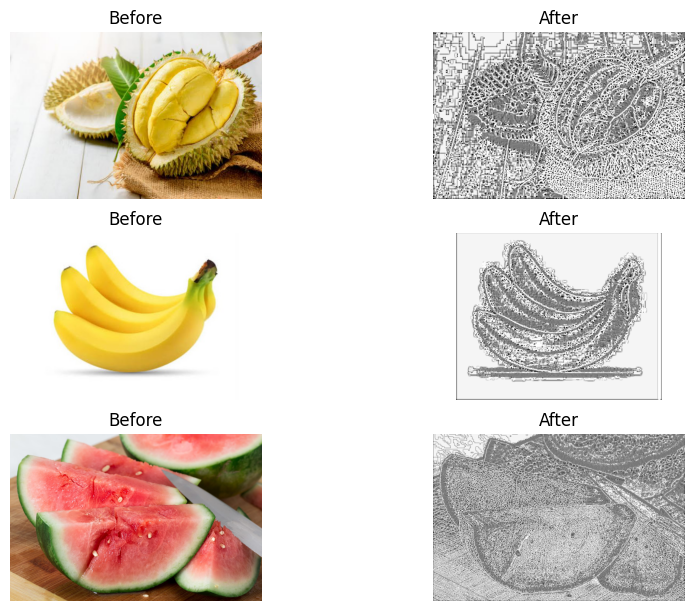

In [ ]:
#Menampilkan hasi ekstraksi tekstur
print('Extraction Result')
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(4,2,1)
ax1.set_title('Before')
ax1.set_axis_off()
ax1.imshow(data[0])

ax2 = fig.add_subplot(4,2,2)
ax2.set_title('After')
ax2.set_axis_off()
ax2.imshow(dataExtracted[0],cmap=plt.cm.gray)

ax3 = fig.add_subplot(4,2,3)
ax3.set_title('Before')
ax3.set_axis_off()
ax3.imshow(data[1],)

ax4 = fig.add_subplot(4,2,4)
ax4.set_title('After')
ax4.set_axis_off()
ax4.imshow(dataExtracted[1],cmap=plt.cm.gray)

ax5 = fig.add_subplot(4,2,5)
ax5.set_title('Before')
ax5.set_axis_off()
ax5.imshow(data[2])

ax6 = fig.add_subplot(4,2,6)
ax6.set_title('After')
ax6.set_axis_off()
ax6.imshow(dataExtracted[2],cmap=plt.cm.gray)
plt.show()

In [ ]:
#Menampilkan vektor gambar
print("Vector of Image 1 :",vector[0])
print()
print("Vector of Image 2 :",vector[1])
print()
print("Vector of Image 3 :",vector[2])

Vector of Image 1 : [0.03097736 0.01488388 0.01582084 0.01380868 0.01161603 0.01067907
 0.01032579 0.0137818  0.01739524 0.02355462 0.02945672 0.04392971
 0.05726223 0.06646289 0.02961416 0.04218251 0.02087429 0.03535881
 0.02032517 0.01835525 0.01765637 0.01979141 0.01969541 0.01675396
 0.12969249 0.26974533]

Vector of Image 2 : [0.006896   0.00461289 0.00378537 0.00353075 0.00315731 0.00376415
 0.00347558 0.00547012 0.00782536 0.01179746 0.01930454 0.03929657
 0.06619731 0.06297211 0.02644667 0.02983314 0.01369014 0.02463037
 0.00947616 0.0098878  0.00973502 0.01068985 0.01176775 0.00674747
 0.47372732 0.13128278]

Vector of Image 3 : [0.03313692 0.01265155 0.01434586 0.01396511 0.01283694 0.01296953
 0.01267619 0.01584128 0.02021491 0.02733005 0.03907872 0.06378576
 0.07995206 0.07612227 0.04443033 0.03858885 0.02494993 0.02632156
 0.0180278  0.01671131 0.01613051 0.01692545 0.0175039  0.01400207
 0.08152316 0.249978  ]
